# Lab 02: Probability, Distributions, and Statistical Questions
## Problem 1

- In the hypothetical telescope I'm using, there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, I am asking what is the probability that the cosmic-ray background would have given me a measurement as signal-like or more than the signal that you received.
  - I assume that in 1 day, the average cosmic-ray background labelled $\lambda_X$, which is equal to 4
  - I also assume that in 1 day, the average amount of gamma particles emitted from this source is labelled $\lambda_Y$, which is equal to 5
    - So I want to know what the probability is that the background Poisson distribution would give me a signal that is greater than or equal to my measurement of $\lambda_Y=5$
- I can define the general equation for a Poisson Distribution (P) as follows:
  - $P(x;\lambda) = e^{-\lambda}\lambda^{x} / x!$
  - Where:
    - x = some possible measurement of number of occurences of a specific event when those events occur independently at a constant rate
    - $\lambda$ = the average number of occurences
- First, I want to show how the Poisson-distributed background over a single observation period where the background has the $\lambda$ value of 4 that I previously chose

In [1]:
# Finch's Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import scipy.signal as signal
import seaborn as sns
import random
%matplotlib inline

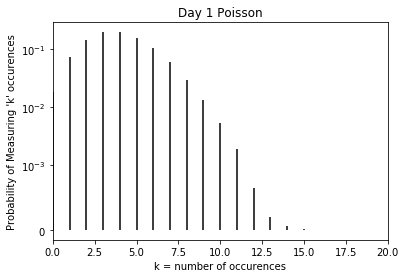

0.9999999999999997

In [2]:
# Let's plot a Day-1 Poisson Distribution
fig, ax = plt.subplots(1,1)
plt.yscale('log')
lamX = muX = 4
muY = 5
k = np.arange(0,40)

Poisson1 = stats.poisson.pmf(k, mu=muX)
ax.vlines(k, 0, Poisson1, label='Poisson PMF')
plt.xlabel('k = number of occurences')
plt.ylabel('Probability of Measuring \'k\' occurences')
plt.title('Day 1 Poisson')
plt.xlim(0, 20)
ax.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
plt.show()
sum(Poisson1)

- Above I can see the Poisson distribution with a $\lambda = 4$ for one observation period with 
  - NOTE: The variance in any Poisson distribution is also equal to $\lambda$
  - From my research I know that convolving two probability mass functions will give the PMF of their sum, but I don't want the sum of their PMFs, I want the average PMF over a set amount of days (in this case 5 days (or 5 observation periods))
  - I also find in my research that the $\lambda_{sum}$ for two independent Poisson distributions $\lambda_X$ and $\lambda_Y$ can be found using the following relation:
    - $\lambda_{sum} = \lambda_X + \lambda_Y$
    - So if I assume that each observation period is independent of the previous and future periods, then I know that each observation period will have a $\lambda_{individual}$ of 4, my assumed emission occurence average of the background
    - Therefore the $\lambda_{5\ day\ sum}$ is equal to 5 days multiplied by the mean of 4 each day, which is equal to a new mean of 20
### Problem 1B)
- Let's show the distribution summed after 5 days

In [3]:
# Day5 = 4
# for i in range(Day5):
#    if i == 0:
#        k = np.sort(stats.poisson.rvs(mu=muX, size=1000))
#        PoissonA = stats.poisson.pmf(k, muX)
#        Poisson5 = np.convolve(PoissonA, PoissonA, mode='full')
#    else:
#        k5 = np.sort(stats.poisson.rvs(mu=muX*(i+1), size=len(Poisson5)))
#        PoissonA = stats.poisson.pmf(k, muX)
#        Poisson5 = np.convolve(PoissonA, Poisson5, mode='full')

# Convolving each day's distribution one by one:     
Poisson2 = np.convolve(Poisson1, Poisson1, mode='full')
Poisson3 = np.convolve(Poisson2, Poisson1, mode='full')
Poisson4 = np.convolve(Poisson3, Poisson1, mode='full')
Poisson5 = np.convolve(Poisson4, Poisson1, mode='full')

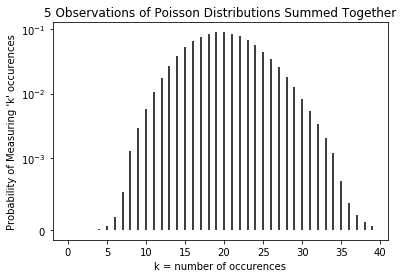

In [4]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')
muX = 4

# Create a new x-axis of occurences over 5 day sum
k = np.arange(0,40)

# Plot the Poisson Distribution summed over 5 observing days
ax.vlines(k, 0, Poisson5, label='Poisson PMF 5-Day Sum')
plt.xlabel('k = number of occurences')
plt.ylabel('Probability of Measuring \'k\' occurences')
plt.title('5 Observations of Poisson Distributions Summed Together')
ax.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
plt.show()

- As we sum over more and more days, the mean becomes larger and larger, and the distribution becomes more and more normalized
- The upper bound becomes larger after each convolution, and the lower bound also increases, but at a different rate
- The Poisson distributions from 5 different observation periods can still be described as a Poisson from the following mathematical explanation:

- $\begin{align*}
  P(X+ Y =k) &= \sum_{i = 0}^k P(X+ Y = k, X = i)\\
    &= \sum_{i=0}^k P(Y = k-i , X =i)\\
    &= \sum_{i=0}^k P(Y = k-i)P(X=i)\\
    &= \sum_{i=0}^k e^{-\mu}\frac{\mu^{k-i}}{(k-i)!}e^{-\lambda}\frac{\lambda^i}{i!}\\
   &= e^{-(\mu + \lambda)}\frac 1{k!}\sum_{i=0}^k \frac{k!}{i!(k-i)!}\mu^{k-i}\lambda^i\\
   &= e^{-(\mu + \lambda)}\frac 1{k!}\sum_{i=0}^k \binom ki\mu^{k-i}\lambda^i\\
   &= \frac{(\mu + \lambda)^k}{k!} \cdot e^{-(\mu + \lambda)}
\end{align*}$

  - Where I define $X$ as my Day 1 with a mean of $\lambda$, and $Y$ is my Day 2 with a mean of $\mu$; I followed and repeated this proof in our convolutions with Day 2 and Day 3, etc. until we had a sum for 5 observation periods with a mean $\lambda_5$ equal to $\sum_{i=1}^5 \lambda_i$
    - NOTE: This proof is only applicable because I consider my individual observation periods to be independent of one another
    - This can also be described as the reversal of *Raikov's Theorem*, which stipulates that if the sum of two independent random variables is Poisson-distributed, then so are each of the two independent events.
### Problem 1C)
- I can show the distribution of 5 days **averaged** together instead of summing them if I make sure that the average $\lambda$ value is correctly calculated
  - Since the $\lambda$ value is 4 for every observation period, I know it will always be 4 after averaging together any number of distributions

In [5]:
# DISREGARD FULL CELL
#k1 = np.sort(stats.poisson.rvs(mu=muX, size=100))
Poisson1 = stats.poisson.pmf(k, mu=muX)
Day2 = np.convolve(Poisson1, Poisson1, mode='full')
Day3 = np.convolve(Day2, Poisson1, mode='full')
Day4 = np.convolve(Day3, Poisson1, mode='full')
Day5 = np.convolve(Day4, Poisson1, mode='full')
Day10 = np.convolve(Day5, Day5, mode='full')
Day20 = np.convolve(Day10, Day10, mode='full')

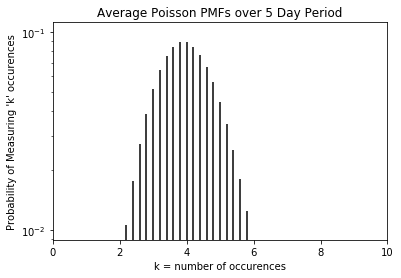

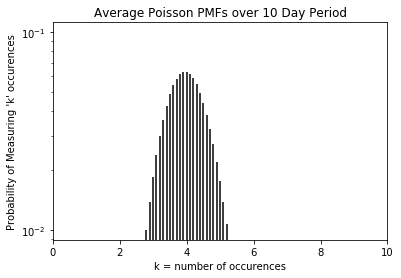

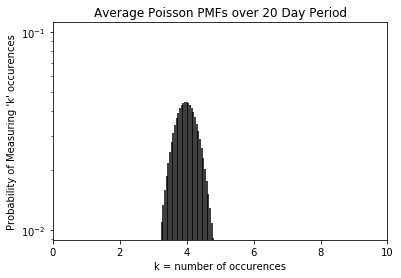

In [6]:
muX = 4
days = 5;
# Create a new x-axis of occurences over each day-sum


# Plot the Poisson Distribution averaged over 5, 10, 20 observing days

# Plot 1
days = 5
avgPMF_day = Poisson1
for i in range(days-1):
    avgPMF_day = np.convolve(avgPMF_day, Poisson1);

k = np.arange(len(avgPMF_day)) / days
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k, 0, avgPMF_day, label='5-Day Average Poisson PMF')
ax1.set_xlabel('k = number of occurences')
ax1.set_ylabel('Probability of Measuring \'k\' occurences')
ax1.set_title('Average Poisson PMFs over 5 Day Period')
ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
ax1.set_yscale('log')
ax1.set_xlim(0,10)

# Plot 2
days = 10
avgPMF_day = Poisson1
for i in range(days-1):
    avgPMF_day = np.convolve(avgPMF_day, Poisson1)

k = np.arange(len(avgPMF_day)) / days
fig, ax2 = plt.subplots(1,1)
ax2.vlines(k, 0, avgPMF_day, label='10-Day Average Poisson PMF')
ax2.set_xlabel('k = number of occurences')
ax2.set_ylabel('Probability of Measuring \'k\' occurences')
ax2.set_title('Average Poisson PMFs over 10 Day Period')
ax2.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
ax2.set_yscale('log')
ax2.set_xlim(0,10)

# Plot 3
days = 20
# Create a new x-axis of occurences over each day-sum
avgPMF_day = Poisson1
for i in range(days-1):
    avgPMF_day = np.convolve(avgPMF_day, Poisson1);

k = np.arange(len(avgPMF_day)) / days
fig, ax3 = plt.subplots(1,1)
ax3.vlines(k, 0, avgPMF_day, label='20-Day Average Poisson PMF')
ax3.set_xlabel('k = number of occurences')
ax3.set_ylabel('Probability of Measuring \'k\' occurences')
ax3.set_title('Average Poisson PMFs over 20 Day Period')
ax3.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
ax3.set_yscale('log')
ax3.set_xlim(0,10)

plt.show()

- The plot shows that if I have a distribution of **k** possible occurences observed and averaged over multiple periods of observation time with an expected count of 4 occurences for every observation period, then the more distributions we average together, the more and more likely that our data will standardize/normalize. 
- This makes sense in terms of the Central Limit Theorem because we take more and more independent samples from the population we are measuring, and the more we average those samples together, the more that our data will approach a central limit.

### Problem 1.D)
- What if over 80 days, I measured 5 gamma-rays per day for a total of 400 gamma-rays? How would I calculate a sigma for that measurement?
  - I can start by setting up the Poisson distribution for a sum of 80 observation periods.

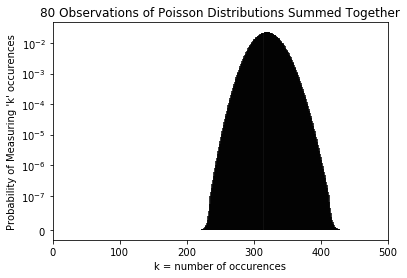

0.00032041012495994206

In [7]:
Day40 = np.convolve(Day20, Day20, mode='full')
Day80 = np.convolve(Day40, Day40, mode='full')
mu80 = 80 * 4
fig, ax = plt.subplots(1,1)
plt.yscale('log')

# Create a new x-axis of 'k' possible occurences over 80 day sum
k80 = np.arange(0*80, 40*80)

# Plot the Poisson Distribution summed over 5 observing days
ax.vlines(k80, 0, Day80, label='Poisson PMF 80-Day Sum')
plt.xlabel('k = number of occurences')
plt.ylabel('Probability of Measuring \'k\' occurences')
plt.title('80 Observations of Poisson Distributions Summed Together')
ax.set_yscale('symlog', nonposy='clip', linthreshy=0.0000001)
plt.xlim(0,500)
plt.show()
Day80.mean()

- I can see that the Poisson Distribution looks remarkably normalized when it is summed over 80 days
- I can now check the probability of the background distribution giving me a false signal of 400 gamma rays or more, and use that output probability to retrieve a sigma value for my measurement

In [8]:
gammaP = 1 - stats.poisson.cdf(400, mu=80*muX)
gammaP

7.196515385388125e-06

In [9]:
stats.norm.ppf(gammaP, loc=0, scale=1)

-4.33777817742247

- So we see that I retrieve a sigma value for my measurement of $4.33\sigma$ which is not a high enough sigma value for me to accurately say that my results are true and not false signals coming from the background distribution

## Problem 2

- If I look at a Rayleigh PDF distribution over some observing interval, does the distribution change as I average several observation intervals?

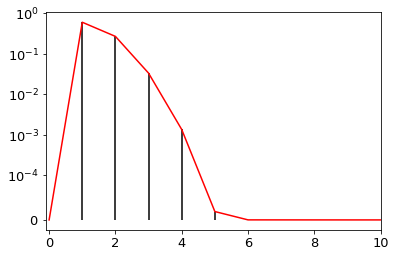

(1.2533141373155001, 0.42920367320510344)

In [10]:
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

plt.tick_params(labelsize = 13)

# Let's create an x-axis that we can plot our results on
r = np.arange(0,500)

# Now let's plot the results of the Rayleigh distribution against its input x-values
ax.vlines(r, 0, stats.rayleigh.pdf(r, loc = 0, scale = 1), label='Rayleigh PDF')
ax.set_yscale('symlog', nonposy='clip', linthreshy=0.0001)
ax.plot(r, stats.rayleigh.pdf(r, loc = 0, scale= 1), 'r-')
plt.xlim(-0.1, 10)
plt.show()
muR = stats.rayleigh.mean()
varR = stats.rayleigh.var()
muR, varR

- Now I want to average over more and more observing intervals like I did with the Poisson distribution

In [11]:
Ray1 = stats.rayleigh.pdf(r, loc=0, scale=1)
Ray2 = np.convolve(Ray1, Ray1, mode='full')
Ray3 = np.convolve(Ray2, Ray1, mode='full')
Ray4 = np.convolve(Ray3, Ray1, mode='full')
Ray5 = np.convolve(Ray4, Ray1, mode='full')
Ray10 = np.convolve(Ray5, Ray5, mode='full')
Ray20 = np.convolve(Ray10, Ray10, mode='full')
Ray40 = np.convolve(Ray20, Ray20, mode='full')
Ray80 = np.convolve(Ray40, Ray40, mode='full')
Ray160 = np.convolve(Ray80, Ray80, mode='full')

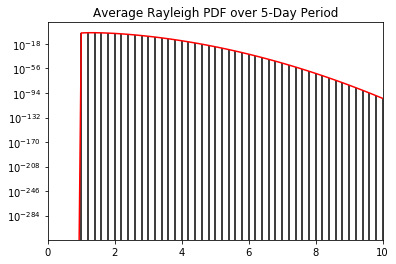

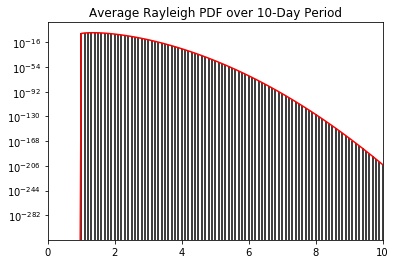

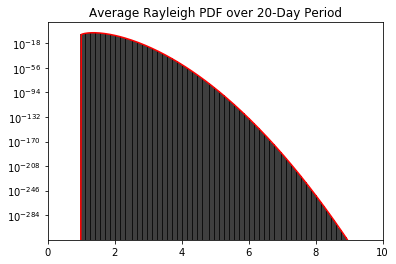

/opt/conda/lib/python3.7/site-packages/matplotlib/ticker.py:1123: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)


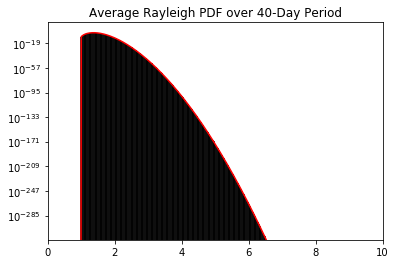

In [12]:
# Create x-axes for 5, 10, 20-day sums
r5 = np.sort(stats.rayleigh.rvs(loc=0, scale=1, size=len(Ray5)))
r10 = np.sort(stats.rayleigh.rvs(loc=0, scale=1, size=len(Ray10)))
r20 = np.sort(stats.rayleigh.rvs(loc=0, scale=1, size=len(Ray20)))
r160 = np.sort(stats.rayleigh.rvs(loc=0, scale=1, size=len(Ray160)))

# Plot the Rayleigh Distributions averaged over 5, 10, 20 observing days

# Plot 1

days = 5
avgPDF_Ray = Ray1
for i in range(days-1):
    avgPDF_Ray = np.convolve(avgPDF_Ray, Ray1);

r = np.arange(len(avgPDF_Ray)) / days
fig, ax1 = plt.subplots(1,1)
ax1.vlines(r, 0, avgPDF_Ray, label='5-Day Average Rayleigh PDF')
ax1.plot(r, avgPDF_Ray, 'r-')
ax1.set_title('Average Rayleigh PDF over 5-Day Period')
ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
ax1.set_yscale('log')
ax1.set_xlim(0,10)

# Plot 2

days = 10
avgPDF_Ray = Ray1
for i in range(days-1):
    avgPDF_Ray = np.convolve(avgPDF_Ray, Ray1);

r = np.arange(len(avgPDF_Ray)) / days
fig, ax2 = plt.subplots(1,1)
ax2.vlines(r, 0, avgPDF_Ray, label='10-Day Average Rayleigh PDF')
ax2.plot(r, avgPDF_Ray, 'r-')
ax2.set_title('Average Rayleigh PDF over 10-Day Period')
ax2.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
ax2.set_yscale('log')
ax2.set_xlim(0,10)


# Plot 3
days = 20
avgPDF_Ray = Ray1
for i in range(days-1):
    avgPDF_Ray = np.convolve(avgPDF_Ray, Ray1);

r = np.arange(len(avgPDF_Ray)) / days
fig, ax3 = plt.subplots(1,1)
ax3.vlines(r, 0, avgPDF_Ray, label='20-Day Average Rayleigh PDF')
ax3.plot(r, avgPDF_Ray, 'r-')
ax3.set_title('Average Rayleigh PDF over 20-Day Period')
ax3.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
ax3.set_yscale('log')
ax3.set_xlim(0,10)


# Plot 4
days = 40
avgPDF_Ray = Ray1
for i in range(days-1):
    avgPDF_Ray = np.convolve(avgPDF_Ray, Ray1);

r = np.arange(len(avgPDF_Ray)) / days
fig, ax4 = plt.subplots(1,1)
ax4.vlines(r, 0, avgPDF_Ray, label='40-Day Average Rayleigh PDF')
ax4.plot(r, avgPDF_Ray, 'r-')
ax4.set_title('Average Rayleigh PDF over 40-Day Period')
ax4.set_yscale('symlog', nonposy='clip', linthresh=0.001)
ax4.set_yscale('log')
ax4.set_xlim(0,10)

plt.show()

- We see from our plot that as we average over more and more days with the same given mean as a single-day observation period, our Rayleigh distribution becomes more and more succinct and begins to approach a semi-Gaussian shape after 40 observation periods, but it will never actually be a gaussian curve through averaging because the rayleigh distribution only has positive input values. It cannot normalize without being summed.

## Problem 3 (Version 1)
- From looking at the single pixel in my image, I can measure the width of the background Gaussian distribution ($\mu=0$) called $X$, where $X = 20$
  - I also know the standard deviation of the distribution to be $\sigma=X/6$ because for any normal distribution, you find 99% of data points within 3$\sigma$ of the mean of the distribution on each side
- If I see a signal of strength $Y$ where $Y = 5.234113516345625$, can I claim a discovery of this signal after I calculate the sigma value associated with it?

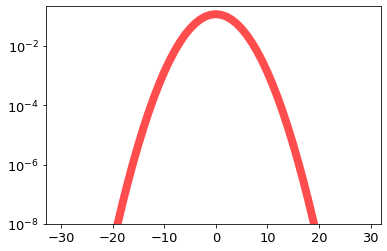

1.0

In [30]:
sigY = 5.234113516345625
width = 20
scaleN = width/6
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

plt.tick_params(labelsize = 13)

# Let's create an x-axis that we can plot our background distribution on
n = np.arange(-30, 30)

LIGO = stats.norm.pdf(n, loc = 0, scale = scaleN)
# Now let's plot the results of the normal distribution against its input x-values
ax.plot(n, LIGO, 'r-', lw=8, alpha=.7, label='Normal PDF')
plt.ylim(0.00000001, LIGO.max() + .1)
plt.show()
LIGO.sum()

- Now I want to calculate the probability that I measured a real signal value at $n=5.234113516345625$

In [74]:
1 - stats.norm.cdf(sigY, loc=0, scale=scaleN)
Ysigma1 = stats.norm.ppf(1-stats.norm.cdf(sigY, loc=0, scale=1))
print(f'The sigma value associated with my LIGO detection is {Ysigma1:f}sigma')

The sigma value associated with my LIGO detection is -5.234114sigma


- With a sigma value of $5.234\sigma$, I can claim that I have made a genuine discovery
## Problem 3 (Version 2)
- This time I can't just look at one pixel for my signal and a possible background distribution, I have to look at 10k pixels instead.
  - From looking at all 10,000 pixels in my image, I can measure the width of the (summed x10000 times over) background Gaussian distribution ($\mu_{10k} =10000 * \mu = 0$) called $X_{10k}$, where $X_{10k} = 200,000$
  - I also know the standard deviation of the distribution to be $\sigma=X_{10k}/6$ because for any normal distribution, you find 99% of data points within 3$\sigma$ of the mean of the distribution on each side
- If I receive a signal of strength $Y_{10k}$ where $Y_{10k} = 10000 * Y = 10000 * 5.234113516345625$ on the 10,000 summed distribution, can I claim a discovery of this signal after I calculate a sigma value?
  - I also need to figure out how to sum the Normal PDF 10000 times over to achieve the pdf of the sum of 10000 distributions

In [16]:
sum = 10000
PDF_10k = LIGO
for i in range(sum-1):
    PDF_10k = signal.fftconvolve(PDF_10k, LIGO, mode='full');

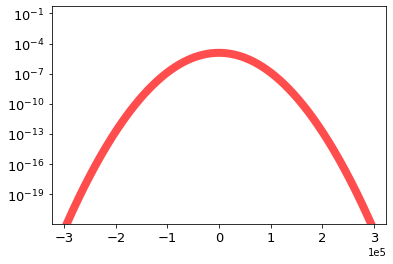

1.0000000000000002

In [17]:
sigY10k = 10000 * 5.234113516345625
width10k = 20*10000
scaleN10k = width10k/6
fig, ax = plt.subplots(1, 1)



plt.tick_params(labelsize = 13, labelrotation = 90)

# Let's create an x-axis that we can plot our background distribution on
n10k = np.arange(-len(PDF_10k)/2, len(PDF_10k)/2)

# Define our PDF function as a new variable, and the pdf must sum to 1!
Ver210k = stats.norm.pdf(n10k, loc=0, scale=scaleN10k)

# Now let's plot the results of the normal distribution against its input x-values
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.yscale('log')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
ax.plot(n10k, Ver210k,'r-', lw=8, alpha=.7, label='10k Sum - Normal PDF')
plt.ylim(Ver210k.min(), Ver210k.max()+0.5)
plt.show()
Ver210k.sum()

- I see that the 10k Sum PDF sums to one, therefore all probabilities within the function are normalized. Now, I want to find a probability that I can use to figure out a sigma value for my possible measurement.

In [73]:
cdf10k = 1-stats.norm.cdf(sigY10k, loc=0, scale=scaleN10k)
cdf10k * 100

5.818033478241757

In [62]:
sigma10k = stats.norm.ppf(cdf10k, loc=0, scale=1)
print(f'The sigma value associated with my LIGO detection is {sigma10k:f}sigma')

The sigma value associated with my LIGO detection is -1.570234sigma


- We see that the sigma value is not high enough for me to say the summed measurement value is an actual signal (i.e. I cannot say that I am certain that the background is not interfering with my signal measurement)

## Problem 4
- We want to solve for a probability of a measurement given that our sigma value is 5 sigma, and then find the measurement associated with that probability 

In [65]:
sig5 = 5
prob5 = 1 - stats.norm.cdf(sig5, loc=0, scale=1)
prob5

Measure5 = stats.norm.isf(prob5, loc=0, scale=scaleN)
Measure5

16.666666666567252

- Any measurement on the Version 1 distribution above would have to be equal to or greater than 16.666666 to have an associated sigma value defined as 5, through the function above, which is just inversing our usual method for calculating a sigma value.

In [72]:
sig5b = 5
prob5b = stats.norm.sf(sig5b, loc=0, scale=1)
prob5b

Measure5b = stats.norm.isf(prob5b, loc=0, scale=scaleN10k)
Measure5b

166666.66666666672

- I see that my measurement for an associated sigma value of 5 sigma in the 10k sum distribution is 10000 times the measurement needed for problem 4 (part A), which is what I expected since the standard deviations and means sum as well.
- When I hypothetically didn't know which specific pixel to look at in my data, I would have had to find a signal that is 10000 times stronger than the signal in the single-pixel distribution (trials factor of 10k). This would make it almost impossible to claim any sort of discovery or progress towards making a discovery statistically speaking. 
- If the trials factor was a factor of 10, you can manage and work through the image to find a possible measurement. With a trials factor of 10000, you probably will never recieve a signal that is 10000 times as signal-like or more than what you expected to find on one observation period's distribution, but you can't claim any discovery unless you do find that 10000x strength of signal, so you're only left with the option of not being able to claim any sort of significant discovery at all. 